In [1]:
# In this notebook, I will build two models to classify MNIST digits: a simple ANN and a more powerful CNN. I will compare their performance and show which model is better for image classification.

In [2]:
# Importing libraries
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Flatten

In [3]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
print("Training input data shape: ", x_train.shape)
print("Training target data shape: ", y_train.shape)
print("Test input data shape: ", x_test.shape)
print("Test target data shape: ", y_test.shape)

Training input data shape:  (60000, 28, 28)
Training target data shape:  (60000,)
Test input data shape:  (10000, 28, 28)
Test target data shape:  (10000,)


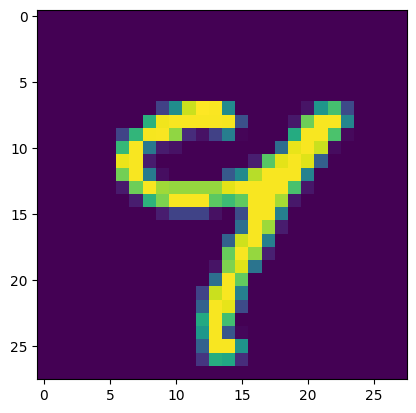

In [5]:
# Confirming if the numpy arrays are digit images
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
i = np.random.randint(1,100)
plt.imshow(x_train[i])

In [6]:
# Data preprocessing
x_train = x_train/255
x_test = x_test/255

In [7]:
i = np.random.randint(1,100)
x_train[i]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [8]:
ann = Sequential()
ann.add(Flatten(input_shape = (28,28)))
ann.add(Dense(128, activation = 'relu'))
ann.add(Dense(10,activation = 'softmax'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [9]:
ann.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
ann.compile(metrics = ['accuracy'], loss = 'sparse_categorical_crossentropy', optimizer = 'Adam')

In [11]:
ann_history = ann.fit(x_train, y_train, epochs=20, validation_split=0.2)

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8597 - loss: 0.4831 - val_accuracy: 0.9551 - val_loss: 0.1576
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9599 - loss: 0.1359 - val_accuracy: 0.9679 - val_loss: 0.1084
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9732 - loss: 0.0897 - val_accuracy: 0.9711 - val_loss: 0.0959
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9818 - loss: 0.0635 - val_accuracy: 0.9700 - val_loss: 0.0991
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9856 - loss: 0.0495 - val_accuracy: 0.9728 - val_loss: 0.0938
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9876 - loss: 0.0397 - val_accuracy: 0.9757 - val_loss: 0.0880
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9917 - loss: 0.0294 - val_accuracy: 0.9766 - val_loss: 0.0793
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.9930 - loss: 0.0238 -

In [12]:
ann_y_prob = ann.predict(x_test)
ann_y_prob

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[4.7079674e-13, 4.6447804e-14, 1.3674104e-09, ..., 9.9999994e-01,
        9.6055122e-14, 2.8941663e-10],
       [6.9783448e-19, 1.7635318e-10, 9.9999994e-01, ..., 9.3675349e-25,
        1.6062376e-14, 3.7451366e-21],
       [8.3418064e-11, 9.9999708e-01, 8.7559897e-07, ..., 8.0294711e-07,
        1.1029158e-06, 1.4055764e-11],
       ...,
       [1.3973636e-22, 6.4593852e-18, 4.3744306e-23, ..., 7.6649407e-12,
        1.1785177e-14, 7.5425364e-09],
       [1.3165524e-23, 3.9213996e-20, 1.9259153e-26, ..., 4.4202434e-22,
        1.4572062e-13, 3.4030061e-22],
       [1.0554064e-12, 7.4218159e-25, 2.4300520e-15, ..., 3.9468243e-19,
        2.0270344e-14, 1.5820220e-19]], dtype=float32)

In [13]:
ann_y_pred = ann_y_prob.argmax(axis=1) # Changing raw probabilites to predicted digits
ann_y_pred

array([7, 2, 1, ..., 4, 5, 6])

In [14]:
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_score(y_test, ann_y_pred)

0.9788

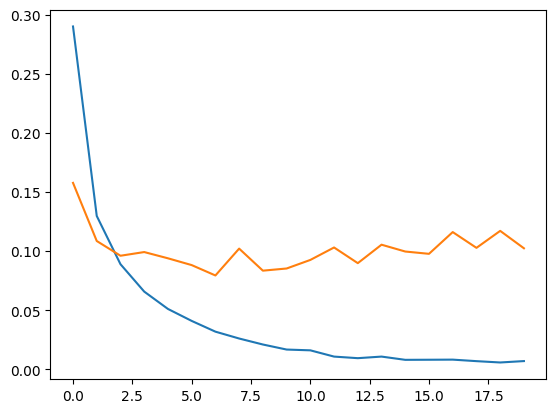

In [15]:
plt.plot(ann_history.history['loss']);
plt.plot(ann_history.history['val_loss']);

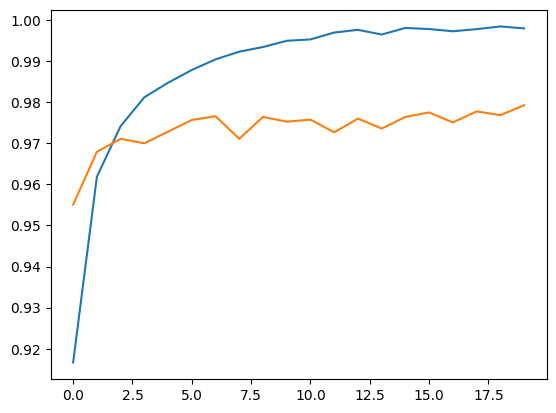

In [16]:
plt.plot(ann_history.history['accuracy']);
plt.plot(ann_history.history['val_accuracy']);

In [17]:
ann_conf_mat = confusion_matrix(y_test, ann_y_pred)
ann_conf_mat

array([[ 971,    2,    1,    0,    0,    0,    3,    1,    1,    1],
       [   0, 1127,    2,    0,    0,    0,    2,    1,    3,    0],
       [   3,    2, 1008,    3,    4,    0,    2,    5,    4,    1],
       [   1,    0,    4,  992,    0,    4,    0,    3,    2,    4],
       [   2,    0,    5,    0,  961,    0,    2,    1,    1,   10],
       [   3,    0,    0,   14,    1,  852,    7,    2,    7,    6],
       [   3,    3,    1,    1,    4,    3,  942,    0,    1,    0],
       [   2,    3,    8,    1,    1,    0,    0, 1005,    2,    6],
       [   3,    0,    2,    3,    2,    1,    1,    3,  952,    7],
       [   4,    2,    0,    8,    8,    0,    0,    7,    2,  978]])

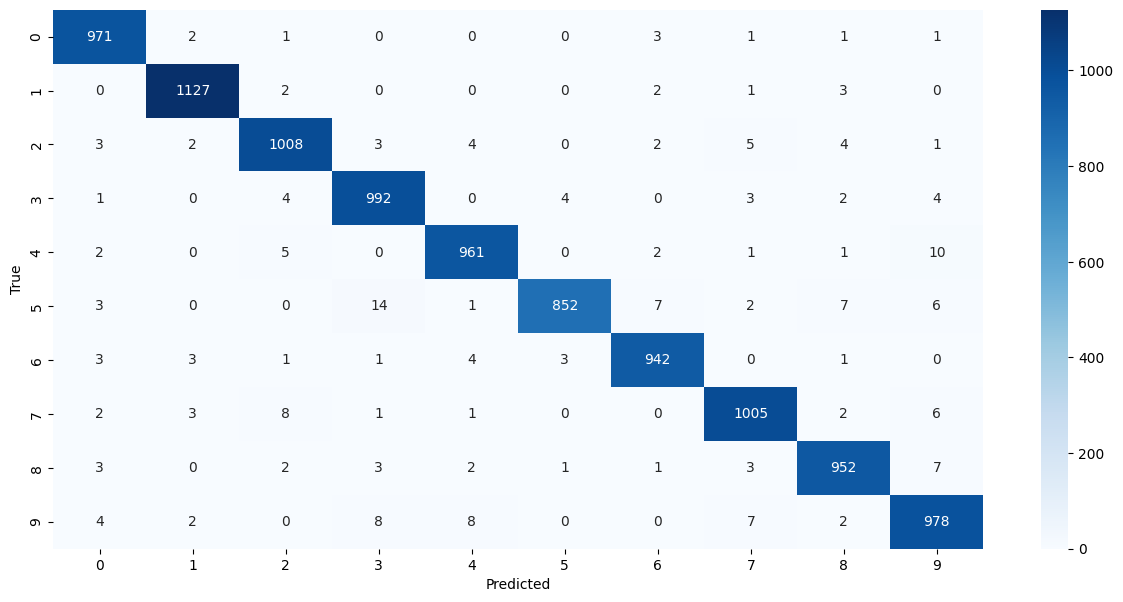

In [18]:
plt.figure(figsize=(15, 7));
sns.heatmap(ann_conf_mat, annot = True, fmt = 'd', cmap = 'Blues')
plt.xlabel('Predicted');
plt.ylabel('True');

In [32]:
# Importing libraries
from keras.layers import Activation, Conv2D, MaxPooling2D, Dropout

In [33]:
# Resizing image for convolution operation
img_size = 28
x_train_new = np.array(x_train).reshape(-1, img_size, img_size, 1)
x_test_new = np.array(x_test).reshape(-1, img_size, img_size, 1)
print("Training input sample shape:", x_train_new.shape)
print("Test input sample shape:", x_test_new.shape)

Training input sample shape: (60000, 28, 28, 1)
Test input sample shape: (10000, 28, 28, 1)


In [34]:
# Creating the model
cnn = Sequential()

# 1st convulational layer
cnn.add(Conv2D(64, kernel_size=(3,3), input_shape=x_train_new.shape[1:]))
cnn.add(Activation('relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))

# 2nd convulational layer
cnn.add(Conv2D(64, kernel_size=(3,3)))
cnn.add(Activation('relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))

# 3rd convolutional layer
cnn.add(Conv2D(64,kernel_size=(3,3)))
cnn.add(Activation('relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))

# 1st Fully connected layer
cnn.add(Flatten())
cnn.add(Dense(64))
cnn.add(Activation('relu'))

# 2nd Fully connected layer
cnn.add(Dense(32))
cnn.add(Activation('relu'))

# 3rd Fully connected layer
cnn.add(Dense(10))
cnn.add(Activation('softmax'))



/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [35]:
cnn.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 26, 26, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_6 (Activation)       │ (None, 26, 26, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 11, 11, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_7 (Activation)       │ (None, 11, 11, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_8 (Activation)       │ (None, 3, 3, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 1, 1, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_9 (Activation)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_10 (Activation)      │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │           330 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_11 (Activation)      │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 81,066 (316.66 KB)

 Trainable params: 81,066 (316.66 KB)

 Non-trainable params: 0 (0.00 B)

In [36]:
cnn.compile(loss='sparse_categorical_crossentropy', optimizer='Adam',metrics=['accuracy'])

In [ ]:
cnn_history = cnn.fit(x_train_new, y_train, epochs=25, validation_split=0.2)

Epoch 1/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 67s 44ms/step - accuracy: 0.8067 - loss: 0.5747 - val_accuracy: 0.9718 - val_loss: 0.0938
Epoch 2/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 81s 43ms/step - accuracy: 0.9712 - loss: 0.0949 - val_accuracy: 0.9778 - val_loss: 0.0694
Epoch 3/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 81s 43ms/step - accuracy: 0.9829 - loss: 0.0562 - val_accuracy: 0.9824 - val_loss: 0.0618
Epoch 4/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 64s 43ms/step - accuracy: 0.9847 - loss: 0.0480 - val_accuracy: 0.9848 - val_loss: 0.0492
Epoch 5/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 82s 43ms/step - accuracy: 0.9872 - loss: 0.0391 - val_accuracy: 0.9858 - val_loss: 0.0507
Epoch 6/25


In [ ]:
cnn_y_prob = cnn.predict(x_test_new)
cnn_y_prob

In [ ]:
cnn_y_pred = cnn_y_prob.argmax(axis=1)
cnn_y_pred

In [ ]:
accuracy_score(y_test, cnn_y_pred)

In [ ]:
plt.plot(cnn_history.history['loss']);
plt.plot(cnn_history.history['val_loss']);

In [ ]:
plt.plot(cnn_history.history['accuracy']);
plt.plot(cnn_history.history['val_accuracy']);

In [ ]:
cnn_conf_mat = confusion_matrix(y_test, cnn_y_pred)
cnn_conf_mat

In [ ]:
plt.figure(figsize=(15, 7));
sns.heatmap(cnn_conf_mat, annot = True, fmt = 'd', cmap = 'Blues')
plt.xlabel('Predicted');
plt.ylabel('True');